## 5_5.対応がある2群の差のt検定

In [2]:
import pandas as pd
from scipy import stats

# CSVファイルのデータをデータフレームに読み込む
df = pd.read_csv('weights.csv')

# 対応のある２群のt検定を実施
result = stats.ttest_rel(df['before'], df['after'])

# 結果を出力
print('統計検定量：　', result.statistic)
print('p値：　', result.pvalue)
print('自由度：　', result.df)

統計検定量：　 3.0550504633038935
p値：　 0.018451528513015857
自由度：　 7


In [3]:
# 自由度を取得
dof = result.df
# 自由度7のt分布で0.025(0.05➗2)のパーセント点のt値を求める
low = stats.t.ppf(q=0.025, df=dof)
# 自由度7のt分布で0.975(1-(0.05➗2))のパーセント点のt値を求める
upp = stats.t.ppf(q=0.975, df=dof)
# 結果を出力
print('下限境界値：　', low)
print('上限境界値：　', upp)

下限境界値：　 -2.3646242510103
上限境界値：　 2.3646242510102993


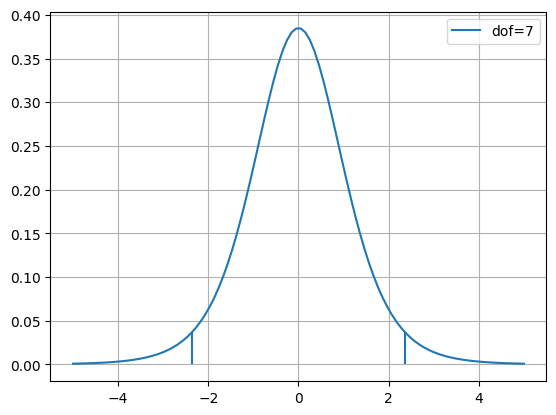

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# -5~5の範囲で１００個の等差数列
x = np.linspace(-5, 5, 100)

# xに対するt分布の確率密度を求める
y = stats.t.pdf(x, df=dof)
# 確率密度のラインを描画
plt.plot(x, y, label=f'dof={dof}')

# パーセント点0.025におけるt値
xnum_low = low
# パーセント点0.025におけるt値の確率密度（y軸の値）を求める
ymax_low = stats.t.pdf(xnum_low, df=dof)

# 確率密度のグラフ上にパーセント点0.025の境界線（垂直線）を引く
plt.vlines(
    x=xnum_low, ymin=0, ymax=ymax_low
)

# パーセント点0.975におけるt値
xnum_upp = upp
# パーセント点0.975におけるt値の確率密度（y軸の値）を求める
ymax_upp = stats.t.pdf(xnum_upp, df=dof)

# 確率密度のグラフ上にパーセント点0.975の境界線（垂直線）を引く
plt.vlines(
    x=xnum_upp, ymin=0, ymax=ymax_upp
)

# 凡例（自由度）を表示
plt.legend()
# グリッドを表示
plt.grid()
plt.show()